ac### Try out a linear regression on the data with one feature

Here we are going to use a linear regression the same way we did it in notebook 2 and 3 - but instead of using all features we just fit out linear regression model on `salary beginn` as the most significant one. 

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sms
import scipy.stats as stats

In [44]:
%store -r df

<AxesSubplot:>

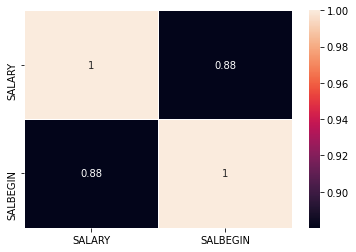

In [45]:
df = df[["SALARY", "SALBEGIN"]]
sns.heatmap(df.corr(),annot=True,lw=1)

In [46]:
df_X = pd.get_dummies(data=df.drop(columns = "SALARY"))
Y = df["SALARY"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_X, Y, test_size=0.4, random_state=17)
X_train

,SALBEGIN
470,15750
365,12000
350,13500
172,42480
65,30000
...,...
406,15750
390,12450
143,9750
241,18000


In [51]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
predictions = model.predict(X_test)

In [36]:
mean_squared_error(y_test, predictions)**0.5

8510.19646124269

In [37]:
plx.scatter(x = predictions, y = y_test - predictions)

In [38]:
plx.histogram(x = y_test-predictions)

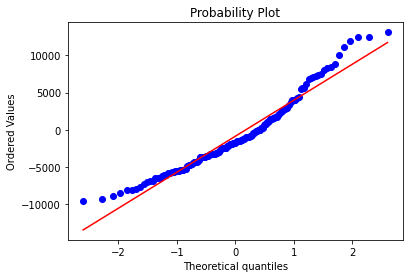

In [23]:
qq = stats.probplot(y_test-predictions, plot=plt)

In [24]:
X_train_sms = sms.add_constant(X_train)
ls=sms.OLS(y_train,X_train_sms).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     34.11
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.88e-08
Time:                        23:48:00   Log-Likelihood:                -2204.4
No. Observations:                 220   AIC:                             4413.
Df Residuals:                     218   BIC:                             4420.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.224e+04   1103.912     20.151      0.0

<AxesSubplot:xlabel='SALBEGIN', ylabel='SALARY'>

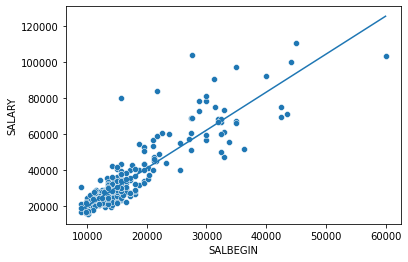

In [39]:
 mod = model.fit(X_train,y_train)
 
 sns.scatterplot(x = X_train["SALBEGIN"], y = y_train)
 sns.lineplot(x = X_train["SALBEGIN"], y = mod.intercept_ + X_train["SALBEGIN"]*mod.coef_)

<AxesSubplot:xlabel='SALBEGIN', ylabel='SALARY'>

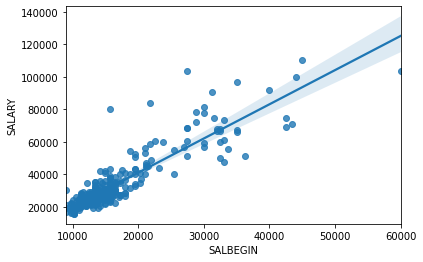

In [40]:
sns.regplot(y = y_train,x = X_train["SALBEGIN"])

<AxesSubplot:ylabel='SALARY'>

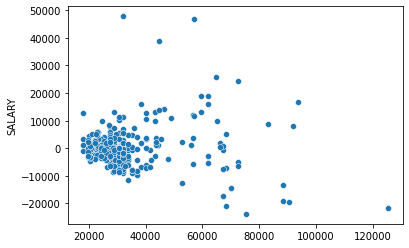

In [41]:
predictions = model.predict(X_train)
sns.scatterplot(x = predictions, y = y_train - predictions)

<AxesSubplot:xlabel='SALBEGIN', ylabel='SALARY'>

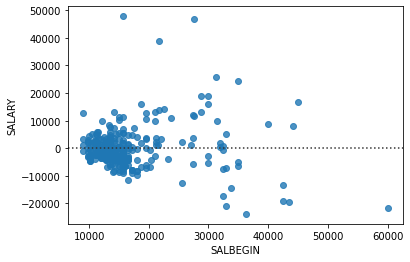

In [42]:
sns.residplot(x = X_train["SALBEGIN"], y = y_train)